##  Chapter 18: Reinforcement Learning Foundations

In [1]:
%load_ext autoreload
%autoreload 2

<h1 id="3.1--Whats-the-use-of-a-recursive-definition-of-$Q$-if-we-don't-know-what-$Q$-is-to-begin-with?">18.2.1 Resolving $Q$ and the curse of recursion<a class="anchor-link" href="#3.1--Whats-the-use-of-a-recursive-definition-of-$Q$-if-we-don't-know-what-$Q$-is-to-begin-with?">&#182;</a></h1>
<p>At first glance the recursive definition of $Q$</p>
<p style="text-align: center !important;">$Q\left(s_{k},\,a_{k}\right)=r_{k}+\underset{i\in\varOmega(s_{k+1})}{\text{maximum}}\,\,Q\left(s_{k+1},\,\alpha_{i}\right)$</p>

<p>seems to aid little in helping us determine the optimal $Q$ function. $Q$ is on both sides of the recursive definition above but we don't know $Q$ to begin with. So how does this recursion help?</p>
<p>The answer is in the agent's intrinsic ability to interact with the problem environment. The idea here is to initialize $Q$ to some (random) value, run a large number of episodes and update $Q$ via the recursive definition as we go along. This essentially constitutes the training phase of Reinforcement Learning.</p>
<p>More specifically, by running through an episode of simulation</p>
<p style="text-align: center !important;">($s_1$, $a_1$, $r_1$) $\rightarrow$ ($s_2$, $a_2$, $r_2$) $\rightarrow$ ($s_3$, $a_3$, $r_3$) $\rightarrow$ $\,\,\cdots$</p>
<p>we <em>generate data</em> that can be used to resolve the optimal $Q$ function step-by-step via the recursive definition. After initializing $Q$, the agent takes its first action for which it receives the reward $r_1$. Based on this reward, we update $Q\left(s_{1},\,a_{1}\right)$ via </p>

<p style="text-align: center !important;">$Q\left(s_{1},\,a_{1}\right)=r_{1}+\underset{i\in\varOmega(s_{2})}{\text{maximum}}\,\,Q\left(s_{2},\,\alpha_{i}\right)$</p>

<p> The agent then takes its second action for which it receives the reward $r_2$, and we update $Q\left(s_{2},\,a_{2}\right)$ via  

<p style="text-align: center !important;">$Q\left(s_{2},\,a_{2}\right)=r_{2}+\underset{i\in\varOmega(s_{3})}{\text{maximum}}\,\,Q\left(s_{3},\,\alpha_{i}\right)$</p>

<p>This sequential update process continues until a goal state is reached or a maximum number of steps is taken. The current episode then ends, we begin a new episode, and start updating $Q$ again.</p>
<p>Performing enough <em>training episodes</em>  - and subsequent updates to $Q$ - our $Q$ function eventually becomes optimal since by construction it will satisfy the desired recursive definition for all state/action pairs.  You can see that in order for $Q$ to be optimal for all state/action pairs we will need to visit every such pair at least once.  In practice one must typically cycle through each pair multiple times in order for $Q$ to be trained appropriately, or as we will see later, employ function approximators to generalize from a small subset of state/action pairs to the entire space <a href="#bib_cell">[1]</a>.</p>

<h1 id="3.2--The-basic-Q-Learning-algorithm">18.2.2 The basic Q-Learning algorithm<a class="anchor-link" href="#3.2--The-basic-Q-Learning-algorithm">&#182;</a></h1>
<p>In the most basic approach we run each episode by taking a random initial state, a <strong>random</strong> action, and repeat taking steps until a goal state is reached or maximum number of steps is taken. More precisely, at the $k^{th}$ step we are at a state $s_{k}$ and take a <strong>random</strong> action $a_k$ and update $Q(s_{k},a_k)$ using the recursive definition of $Q$, as </p>
<p style="text-align: center !important;">$Q\left(s_{k},\,a_{k}\right)=r_{k}+\underset{i\in\varOmega(s_{k+1})}{\text{maximum}}\,\,Q\left(s_{k+1},\,\alpha_{i}\right)$</p>
<p>
Pseudo-code for this basic version of the Q-Learning algorithm is given below.
</p>
<br>

<hr style="height:1px;border:none;color:#555;background-color:#555;">
<p style="line-height: 1.7;">
<strong>1:</strong>&nbsp;&nbsp; initialize $Q$<br>
<strong>2:</strong>&nbsp;&nbsp; set the number of episodes $E$<br>
<strong>3:</strong>&nbsp;&nbsp; set the maximum number of steps per episode $T$<br>
<strong>4:</strong>&nbsp;&nbsp; <code>for</code> $e$ = $1$, $2$, ..., $E$<br>
<strong>5:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \longleftarrow 1$<br>
<strong>6:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;select a random initial state $s_1$<br>
<strong>7:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<code>while</code> goal state not reached <code>and</code> $k \leq T$<br>
<strong>8:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;select a valid action $a_k$ at random<br>
<strong>9:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;record the resulting state $s_{k+1}$ and corresponding reward $r_k$<br>
<strong>10:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Q\left(s_{k},\,a_{k}\right) \longleftarrow r_{k}+\underset{i\in\varOmega(s_{k+1})}{\text{maximum}}\,\,Q\left(s_{k+1},\,\alpha_{i}\right)$<br>
<strong>11:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \longleftarrow k+1$<br>
<strong>12:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;<code>end while</code><br>
<strong>13:</strong>&nbsp; <code>end for</code><br>
<hr style="height:1px;border:none;color:#555;background-color:#555;">
</p>


<h3 id="Example:--Applying-Q-learning-to-the-gridworld-maze"><span style="color:#a50e3e;">Example.</span> &nbsp; Applying Q-learning to Gridworld<a class="anchor-link" href="#Example:--Applying-Q-learning-to-the-gridworld-maze">&#182;</a></h3>
<p>We can now use Q-Learning to train an agent for the small Gridworld maze we first saw in part 1.</p>


In [2]:
# import gridworld library - make sure this is executed prior to running any gridworld cell
import sys
sys.path.append('../../')
from mlrefined_libraries import gridworld_library as lib
%matplotlib inline

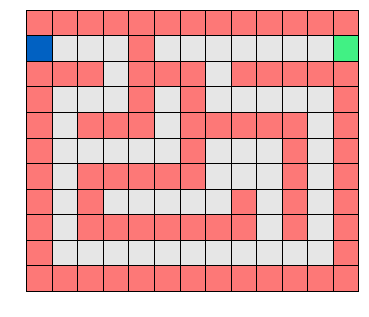

In [3]:
# generate instance of gridworld
small_maze = lib.gridworld_enviro.environment(world_size = 'small', world_type = 'maze')

# show the grid
small_maze.color_gridworld()

<p>Recall that with Gridworld our goal is to train the agent (shown in blue) to efficiently reach the goal square (shown in green) while avoiding the hazard squares (shown in red), starting from <em>any</em> square on the grid. The agent can only move up, down, left, and right one square at a time.</p>
<p>For this example we preset reward values for the agent at each location on the grid as</p>
<br>
<p style="text-align: center !important;">$r_{k}=\begin{cases}
-0.001 & \text{if on standard square}\\
-1 & \text{if on hazard square}\\
0 & \text{if at goal}
\end{cases}$</p>
<br>
<p>You can see these values by exposing the following functionality in the Python cells below.</p>

In [6]:
# show preset rewards and gamma value
print ('the standard square reward is preset to ' + str(small_maze.standard_reward))
print ('the hazard reward is preset to ' + str(small_maze.hazard_reward))
print ('the goal reward is preset to ' + str(small_maze.goal_reward))

the standard square reward is preset to -0.001
the hazard reward is preset to -1
the goal reward is preset to 0


<p>In the next Python cell we train an agent for this Gridworld via the basic Q-Learning algorithm.</p>


In [7]:
# create an instance of the q-learner
qlearner = lib.gridworld_qlearn.learner(gridworld = small_maze)

# run q-learning
qlearner.train(verbose = False, action_method = 'random',training_episodes = 500)

q-learning algorithm complete


<p>To examine this Q-Learning function enter <code>qlearner.train??</code> into a Python cell and activate. This function contains a few containers and switches used to capture output and control variables, but the heart of the function mirrors the pseudo-code given above.  In the next cell we show the stripped down code at the heart of the function (note: this will not run!)</p>

In [ ]:
### start main Q-learning loop ###
for n in range(self.training_episodes): 
    # pick this episode's starting position
    grid.agent = self.training_start_schedule[n]

    # update Q matrix while loc != goal
    episode_history = []      # container for storing this episode's journey
    total_episode_reward = 0
    for step in range(self.max_steps):   
        # update episode history container
        episode_history.append(grid.agent)

        ### if you reach the goal end current episode immediately
        if grid.agent == grid.goal:
            break

        # translate current agent location tuple into index
        s_k_1 = grid.state_tuple_to_index(grid.agent)

        # get action
        a_k = grid.get_action(method = self.action_method,Q = Q,exploit_param = self.exploit_param)

        # move based on this action
        s_k = grid.get_movin(action = a_k)

        # get reward     
        r_k = grid.get_reward(state_index = s_k)          

        # update Q
        Q[s_k_1,a_k] = r_k + max(Q[s_k,:])

        # update current location of agent 
        grid.agent = grid.state_index_to_tuple(state_index = s_k)

<p>Let's now see what each episode of training looks like, where each action is taken randomly to update the $Q$ function. In the next Python cell we animate two of the training episodes. </p>

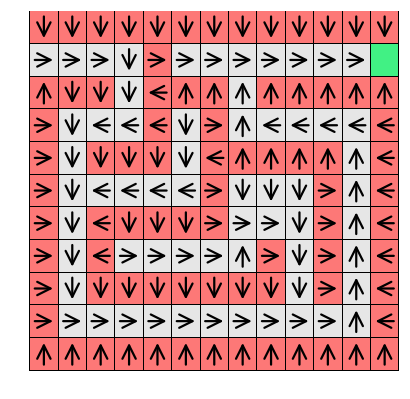

In [9]:
animator = lib.gridworld_animators.animator()
animator.draw_arrow_map(small_maze,qlearner.Q)

# DP solution

First lets setup the maze correctly, using 'costs' instead of 'rewards'.

In [6]:
maze = small_maze

In [46]:
# swap out the small_maze 'rewards' with 'costs
maze.standard_reward = 1
maze.hazard_reward = 500
maze.goal_reward = 0

In [47]:
# a test - for this setup we convert a tuple to index in defining its reward
ind = maze.state_tuple_to_index([0,0])
r = maze.get_reward(ind)
print (r)

500


Now that 'rewards' are 'costs' we can do our DP.  The goal state of this maze is stored via the command below (where we being our DP recursion).

Lets give it a whirl.

In [48]:
# DP recursion
import copy
from autograd import numpy as np

In [126]:
### find all valid neighbors of s_t ###
def find_neighbors(s_t):
    # get all neighbor nodes - in tuple format
    neighbors = []
    action_inds = []
    
    # neighbor down
    if s_t[0] + 1 < maze.height:    
        n_down = copy.deepcopy(s_t)
        n_down[0] += 1
        neighbors.append(n_down)
        action_inds.append(1)
        
    # neighbor up
    if s_t[0] - 1 >= 0:            
        n_up = copy.deepcopy(s_t)
        n_up[0] -= 1
        neighbors.append(n_up)
        action_inds.append(0)

    # neighbor left
    if s_t[1] - 1 >= 0:    
        n_left = copy.deepcopy(s_t)
        n_left[1] -= 1
        neighbors.append(n_left)   
        action_inds.append(2)

    # neighbor right
    if s_t[1] + 1 < maze.width:     
        n_right = copy.deepcopy(s_t)
        n_right[1] += 1
        neighbors.append(n_right)
        action_inds.append(3)

    return neighbors,action_inds
    
### create Q to run DP algo on ###
def create_queue(s_t,frontier):    
    # find neihbors of input node
    neighbors,action_inds = find_neighbors(s_t)
    
    # add any neighbors not in frontier to frontier
    new_frontier = []
    for node in neighbors:
        if node not in frontier:
            frontier.append(node)
            new_frontier.append(node)
            
    # recurse
    for node in new_frontier:
        frontier = create_queue(node,frontier)
    return frontier

def initialize_Q(queue):
    # initialize Q matrix to zeros
    Q = np.zeros((maze.width*maze.height,len(maze.action_choices)))
    
    # set any boundary conditions to zero
    for node in queue:
        # get neighbors of current node
        neighbors,action_inds = find_neighbors(node)
        
        # any action not allowed --> set Q value to infinity
        node_ind = maze.state_tuple_to_index(node)
        for i in range(4):
            if i not in action_inds:
                Q[node_ind,i] = np.inf
                
    return Q

def DP_shortest_path(queue):
    # initialize Q matrix  
    Q = initialize_Q(queue)

    # loop over queue, update Q matrix accordingly
    c = 0
    for node in queue:
        # get neighbors of current node
        neighbors,action_inds = find_neighbors(node)
        
        # translate s_t and neighbor tuples into indecies to get 
        # instantaneous costs
        node_ind = maze.state_tuple_to_index(node)
        nbr_inds = [maze.state_tuple_to_index(s) for s in neighbors]        

        # update neighbors cost based on costs at node
        cost = maze.get_reward(state_index = node_ind)
        q_t = np.min(Q[node_ind,:])
        totes = cost + q_t

        for i in range(len(neighbors)):
            # compute instantaneous cost
            s_t = nbr_inds[i]                

            # determine location of neighbor
            a_t = action_inds[i]
            if a_t == 0 or a_t == 1:
                a_t = np.mod(a_t + 1,2)
            #if a_t == 2 or a_t == 3:
            #    a_t = np.mod(a_t ,2) + 2
            
            # update Q function appropriately
            Q[s_t,a_t] = totes
        
    return Q

In [127]:
# create queue
s_t = maze.goal
frontier = [s_t]
final_frontier = create_queue(s_t,frontier)
Q = initialize_Q(frontier)

# run DP 
Q = DP_shortest_path(final_frontier)

In [128]:
s_t

[9, 12]

In [129]:
import pandas as pd

# print out Q matrix
df = pd.DataFrame(Q,columns=['down','up','left','right'], index=small_maze.states)
print (df.round(3))   

             down          up   left  right
0,0           inf  500.000000  500.0    0.0
0,1           inf    1.000000  500.0  500.0
0,2           inf    1.000000  500.0  500.0
0,3           inf    1.000000  500.0  500.0
0,4           inf    1.000000  500.0  500.0
0,5           inf    1.000000  500.0  500.0
0,6           inf    1.000000  500.0  500.0
0,7           inf    1.000000  500.0  500.0
0,8           inf    1.000000  500.0  500.0
0,9           inf    1.000000  500.0  500.0
0,10          inf    1.000000  500.0  500.0
0,11          inf    1.000000  500.0  500.0
0,12          inf  500.000000    0.0  500.0
1,0    500.000000  500.000000    1.0    0.0
1,1    500.000000    1.000000    1.0  500.0
1,2    500.000000  500.000000    1.0    1.0
1,3    500.000000  500.000000    1.0    1.0
1,4    500.000000  500.000000    1.0    1.0
1,5    500.000000  500.000000    1.0    1.0
1,6    500.000000  500.000000    1.0    1.0
1,7    500.000000  500.000000    1.0    1.0
1,8    500.000000  500.000000   

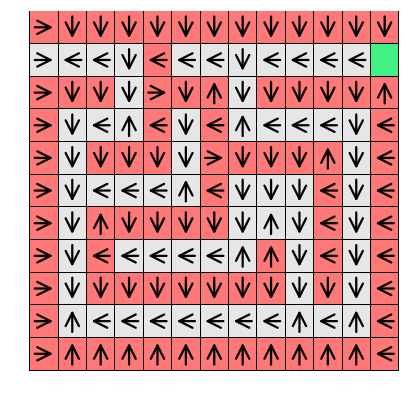

In [130]:
animator = lib.gridworld_animators.animator()
animator.draw_DP_arrow_map(small_maze,Q)

In [33]:
maze.goal

[9, 12]

In [39]:
frontier

[[9, 12],
 [10, 12],
 [8, 12],
 [9, 11],
 [10, 11],
 [10, 10],
 [9, 10],
 [10, 9],
 [8, 10],
 [9, 9],
 [7, 10],
 [8, 9],
 [8, 11],
 [6, 10],
 [7, 9],
 [7, 11],
 [5, 10],
 [6, 9],
 [6, 11],
 [4, 10],
 [5, 9],
 [5, 11],
 [3, 10],
 [4, 9],
 [4, 11],
 [2, 10],
 [3, 9],
 [3, 11],
 [1, 10],
 [2, 9],
 [2, 11],
 [0, 10],
 [1, 9],
 [1, 11],
 [0, 9],
 [0, 11],
 [0, 8],
 [1, 8],
 [0, 7],
 [2, 8],
 [1, 7],
 [3, 8],
 [2, 7],
 [4, 8],
 [3, 7],
 [5, 8],
 [4, 7],
 [6, 8],
 [5, 7],
 [7, 8],
 [6, 7],
 [8, 8],
 [7, 7],
 [9, 8],
 [8, 7],
 [10, 8],
 [9, 7],
 [10, 7],
 [10, 6],
 [9, 6],
 [10, 5],
 [8, 6],
 [9, 5],
 [7, 6],
 [8, 5],
 [6, 6],
 [7, 5],
 [5, 6],
 [6, 5],
 [4, 6],
 [5, 5],
 [3, 6],
 [4, 5],
 [2, 6],
 [3, 5],
 [1, 6],
 [2, 5],
 [0, 6],
 [1, 5],
 [0, 5],
 [0, 4],
 [1, 4],
 [0, 3],
 [2, 4],
 [1, 3],
 [3, 4],
 [2, 3],
 [4, 4],
 [3, 3],
 [5, 4],
 [4, 3],
 [6, 4],
 [5, 3],
 [7, 4],
 [6, 3],
 [8, 4],
 [7, 3],
 [9, 4],
 [8, 3],
 [10, 4],
 [9, 3],
 [10, 3],
 [10, 2],
 [9, 2],
 [10, 1],
 [8, 2],
 [9, 1],
